In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 安裝 `pandas-datareader`

注意要安裝 pandas-datareader 套件

    conda install pandas-datareader
    
如果之前裝過, 但有陣子沒用, 請更新

    conda update pandas-datareader

In [2]:
import pandas_datareader.data as web

In [3]:
df = web.DataReader("AAPL","yahoo" ,start="2012-9-1",end="2017-8-31") # AAPL為蘋果代碼 ; yahoo為資料來源

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-08-31,95.514282,93.892860,95.321426,95.034286,84580300.0,83.044464
2012-09-04,96.448570,94.928574,95.108574,96.424286,91973000.0,84.259094
2012-09-05,96.621429,95.657143,96.510002,95.747147,84093800.0,83.667366
2012-09-06,96.898575,95.828575,96.167145,96.610001,97799100.0,84.421394
2012-09-07,97.497147,96.538574,96.864288,97.205711,82416600.0,84.941940


In [5]:
P = df["Adj Close"]

In [6]:
P.head()

Date
2012-08-31    83.044464
2012-09-04    84.259094
2012-09-05    83.667366
2012-09-06    84.421394
2012-09-07    84.941940
Name: Adj Close, dtype: float64

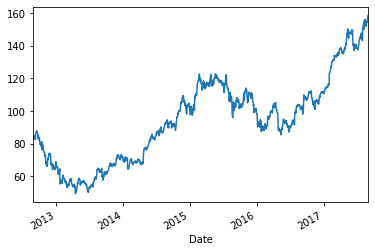

In [7]:
P.plot()

## 計算報酬率

$$\frac{P_{t} - P_{t-1}}{P_{t-1}}$$

In [8]:
P.diff()   # diff( ) 計算與前期的差值

Date
2012-08-31         NaN
2012-09-04    1.214630
2012-09-05   -0.591728
2012-09-06    0.754028
2012-09-07    0.520546
                ...   
2017-08-25    0.570618
2017-08-28    1.557098
2017-08-29    1.392715
2017-08-30    0.425537
2017-08-31    0.628647
Name: Adj Close, Length: 1258, dtype: float64

In [9]:
r = P.diff()/P   # 算報酬率

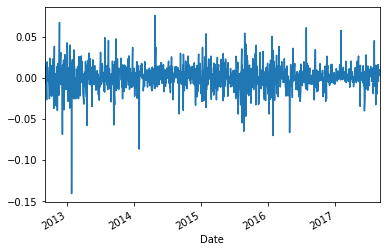

In [10]:
r.plot()   # 畫圖

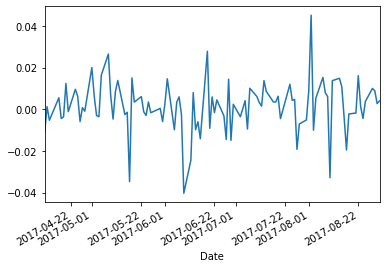

In [11]:
r[-100:].plot()   # 100天到現在的股價變化

## 移動平均

In [12]:
P.rolling(window = 20).mean()

Date
2012-08-31           NaN
2012-09-04           NaN
2012-09-05           NaN
2012-09-06           NaN
2012-09-07           NaN
                 ...    
2017-08-25    152.306973
2017-08-28    152.951180
2017-08-29    153.601440
2017-08-30    153.931464
2017-08-31    154.368545
Name: Adj Close, Length: 1258, dtype: float64

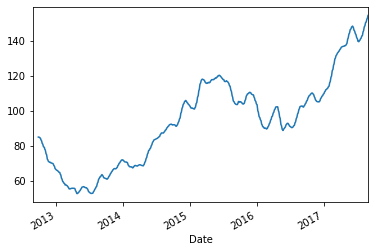

In [13]:
P.rolling(window=20).mean().plot()    # 20天的移動平均

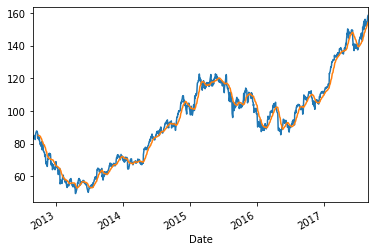

In [14]:
P.plot() # 原本股價圖
P.rolling(window=20).mean().plot() # 前20天移動平均的圖 

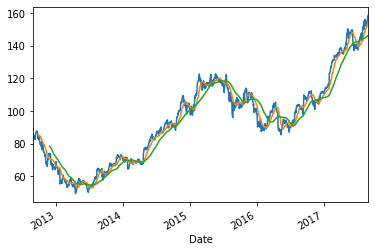

In [15]:
P.plot()
P.rolling(window=20).mean().plot()
P.rolling(window=60).mean().plot()

# QA

Q：將 pandas dataframe 轉 numpy array？

In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.DataFrame(np.random.randn(4,4),columns=list(["a","b","c","d"]))

In [18]:
data

,a,b,c,d
0,0.755451,-1.103747,1.024116,0.538614
1,-0.206304,-1.025340,-0.847240,0.995515
2,0.035915,-0.150121,-1.082561,-2.151456
3,-0.636894,-0.255472,0.902800,-2.684916


In [19]:
data[["a","c"]]

,a,c
0,0.755451,1.024116
1,-0.206304,-0.847240
2,0.035915,-1.082561
3,-0.636894,0.902800


In [20]:
type(data[["a","c"]])

pandas.core.frame.DataFrame

In [21]:
data[["a","c"]].values

array([[ 0.75545051,  1.02411593],
       [-0.20630434, -0.84723979],
       [ 0.03591453, -1.08256086],
       [-0.63689428,  0.90279994]])

In [22]:
type(data[["a","c"]].values)

numpy.ndarray